<a href="https://github.com/SquireUA">Секретарюк Валерій</a>, 2023

<h1 align="center">Лабораторна робота 1. Побудова простого лінійного бінарного класифікатора</h1>
<p><b>Метa:</b> реалізузвати найпростійший бінарний класифікатор засобами мови Python</p>

<h2> Завдання для самостійної роботи </h2>

[0.9999999999999999, -1]


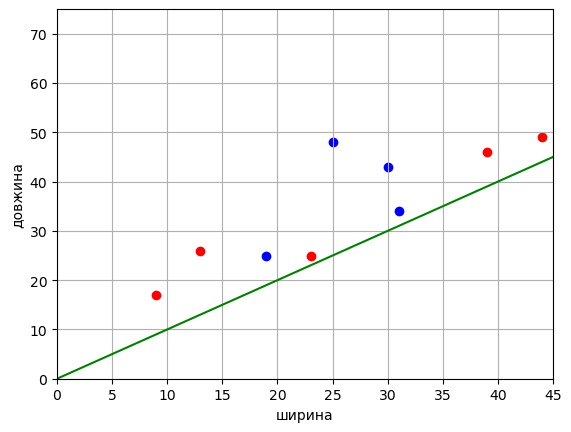

In [2]:
import numpy as np
import matplotlib.pyplot as plt

array_x = []
array_y = []
filename = 'data.txt'  # Назва вашого файлу
    # Відкриваємо файл для читання
with open(filename, 'r') as file:
    for line in file:
        values = line.strip().split()
        row = [int(value) for value in values]
        if len(row) == 2:
            array_x.append(row)
        else:
            array_y = row

x_train = np.array(array_x)
y_train = np.array(array_y)

n_train = len(x_train)                          # розмір навчальної вибірки
w = [0, -1]                                     # початкове значення вектора w
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # правило класифікації
N = 100                                          # максимальна кількість ітерацій
L = 0.1                                         # крок зміни ваги
e = 0.1                                         # невелике додаток до w0, щоб забезпечити зазор між лінією розділення та областю
c = 0

last_error_index = -1                           # індекс останньої помилкової спостереження

for n in range(N):
    c+= 1
    for i in range(n_train):                # ітерація по спостереженням
        if y_train[i]*a(x_train[i]) < 0:    # якщо помилка класифікації,
            w[0] = w[0] + L * y_train[i]    # то коригування ваги w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    if Q == 0:      # показник якості класифікації (кількість помилок)
        break       # зупинка, якщо всі класифікуються правильно

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

line_x = list(range(max(x_train[:, 0])))    # створення графіка роздільної лінії
line_y = [w[0]*x for x in line_x]

x_0 = x_train[y_train == 1]                 # формування точок для 1-го
x_1 = x_train[y_train == -1]                # і 2-го класів

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()


<h1 align="center">Контрольні запитання</h1>


1. Прогнозуваняі певної дискретної (класифікація) або неперервної (регресія) величини нa 
основі вхідних даних, розбиття об’єктів  а класи (сегментація)  або ранжуван
інформації.
1. Навчальна вибірка - це деякі дані прямих вимірювань: зображен, звуковий сигнал, окремі параметри об’єкта (зріст, вага і т. п.) Всі ці виміри мо на
звести до набору чисел, які ми будемо представляти у вигляді обрв. Дані з навчальної вибірки використовуються для навчання моделі машинного навчання. Модель аналізує ці дані, встановлює зв'язки між вхідними зображеннями та їх класами та вдосконалює свої параметри на основі цих зв'язків. Навчальна вибірка дозволяє оцінити ефективність моделі машинного навчання. Після навчання модель тестується на навчальних даних для оцінки того, наскільки добре вона вивчила зв'язки між вхідними зображеннями та їх класа.
1. Задача полягає в тому, щоб побудувати модель машинного навчання, яка буде прогнозувати клас кожного прикладу на підставі його ознак. Отже, задача бінарної класифікації полягає в розробці алгоритму, який може відповісти на питання: "Даний приклад належить до позитивного класу чи негативного кла <
1. Рівняння гіперплощини - це математичне рівняння, яке описує гіперплощину, тобто геометричний об'єкт у просторі, який має розмірність на одиницю менше, ніж розмірність простору, в якому вона знаходить. У контексті задачі бінарної класифікації, рівняння гіперплощини використовується  ля визначення розділюючої границі між двома класами даних. Це означає, що вхідні дані простору ознак розділяються гіперплощиною на дві частини, відпові но до класів, які вони представ.
1. **Вхід:** вибірка $X^l$, шаг навчання $\eta$, максимальна кількість ітерацій $N$
* **Вихід:** вектор ваг $\omega = [\omega_1, \omega_2]^T$
1. ініціалізація $\omega = [0, =1]^T$
2. повторювати $N$ разів
3. \|_по черзі вибирати $x_i, y_i$ з навчальної вибірки $X^l$
4. ||___якщо $M_i = sign(\langle \omega, x_i \rangle) \cdot y_i < 0.$
5. ||_______корегувати вагу: $\omega_1 = \omega_1 + \eta \cdot y_i$
6. \|_обчислюємо показник якості $Q(a, X^l) = \sum_{l=1}^l \Big[M_l < 0\Big]$
7. \|_якщо $Q(a, X^l) = 0$, то цикл припиняється (розв'язок знайдено)зв'язок знайдено)l>